In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("dataset2.csv")
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,37.470001,38.740002,37.410000,38.590000,32.781559,5537100
1,2019-01-03,38.959999,39.060001,38.480000,38.810001,32.968441,7137300
2,2019-01-04,39.570000,40.080002,39.419998,40.029999,34.004814,9336700
3,2019-01-07,39.700001,40.310001,39.580002,40.160000,34.115242,6114300
4,2019-01-08,40.180000,40.259998,39.830002,40.029999,34.004814,5654900


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       607 non-null    object 
 1   Open       607 non-null    float64
 2   High       607 non-null    float64
 3   Low        607 non-null    float64
 4   Close      607 non-null    float64
 5   Adj Close  607 non-null    float64
 6   Volume     607 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 33.3+ KB


In [5]:
#  Use only one feature
open_prices = data['Open']
close_prices = data['Close']

In [6]:
# Split the data into training/testing sets
open_prices_train = np.array(open_prices[:400]).reshape((-1, 1))
open_prices_test = np.array(open_prices[400:]).reshape((-1, 1))

In [7]:
# Split the targets into training/testing sets
close_prices_train = close_prices[:400]
close_prices_test = close_prices[400:]

In [8]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(open_prices_train, close_prices_train)

# Make predictions using the testing set
close_prices_pred = regr.predict(open_prices_test)

In [9]:

# The coefficients
print("Coefficients: \n", regr.coef_, regr.intercept_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(close_prices_test, close_prices_pred))

Coefficients: 
 [1.00013745] -0.049555174904597266
Mean squared error: 0.11


In [10]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(close_prices_test, close_prices_pred))

Coefficient of determination: 0.99


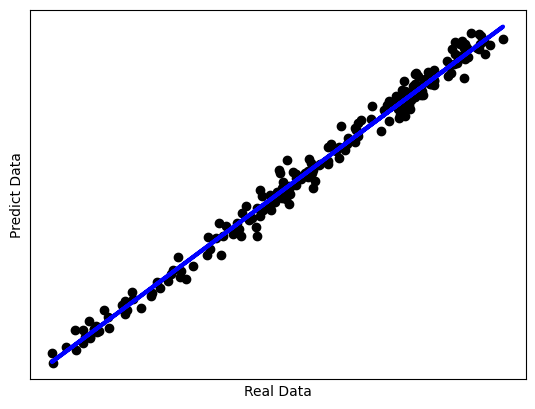

In [11]:
# Plot outputs
plt.scatter(open_prices_test, close_prices_test, color="black")
plt.plot(open_prices_test, close_prices_pred, color="blue", linewidth=3)
plt.xticks(())
plt.xlabel("Real Data")
plt.yticks(())
plt.ylabel("Predict Data")
plt.show()

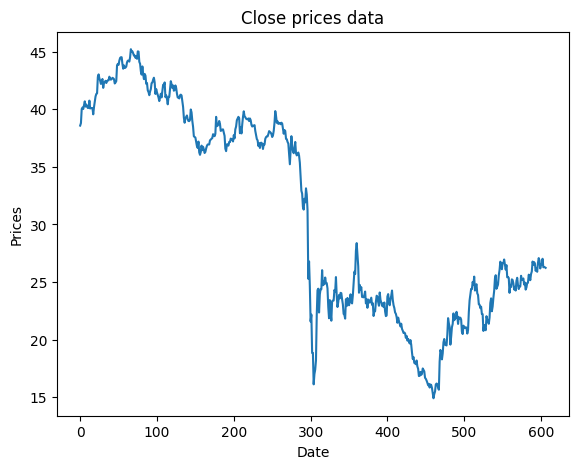

In [12]:
import matplotlib.pyplot as plt
data = pd.read_csv("dataset2.csv")
fig = plt.figure()
 # grapth margins and size xmin, ymin, width, and height 
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(data['Close'])
ax1.set_xlabel("Date") 
ax1.set_ylabel("Prices")
ax1.set_title("Close prices data") 
plt.show()

In [13]:
# Heteroscedasticity Testing

# Dependent variable Y
Y = data['Close']

#Open + Volume = independent variables X
X = data[['Open','Volume']]

In [14]:
# #fit regression model
# model = sm.OLS(Y, X).fit()

fit = smf.ols('Close ~ Open+Volume', data=data).fit()

In [15]:
#view model summary
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.023e+05
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:12:27   Log-Likelihood:                -220.96
No. Observations:                 607   AIC:                             447.9
Df Residuals:                     604   BIC:                             461.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0847      0.089     -0.952      0.3

In [18]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 57.990110388181066),
 ('p-value', 2.556274729341133e-13),
 ('f-value', 31.899267515223393),
 ('f p-value', 6.764347982828124e-14)]

In [19]:
datafood = pd.read_csv("food.csv")
datafood.head()

,food_exp,income,incomebc
0,115.22,3.69,1.305626
1,135.98,4.39,1.479329
2,119.34,4.75,1.558145
3,114.96,6.03,1.796747
4,187.05,12.47,2.523326


In [21]:
# Heteroscedasticity Testing

# Dependent variable Y
Y = datafood['income']

#Open + Volume = independent variables X
X = datafood['food_exp']

In [22]:
# #fit regression model
model = sm.OLS(Y, X).fit()

# fit = smf.ols('Close ~ Open+Volume', data=data).fit()

In [23]:
#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 income   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              394.3
Date:                Tue, 10 Dec 2024   Prob (F-statistic):                    5.39e-22
Time:                        19:16:36   Log-Likelihood:                         -129.88
No. Observations:                  40   AIC:                                      261.8
Df Residuals:                      39   BIC:                                      263.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [24]:
from statsmodels.compat import lzip
#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 57.990110388181066),
 ('p-value', 2.556274729341133e-13),
 ('f-value', 31.899267515223393),
 ('f p-value', 6.764347982828124e-14)]